In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


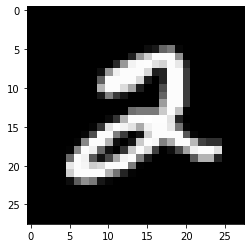

In [4]:
plt.imshow(x_train[5], cmap = 'gray')

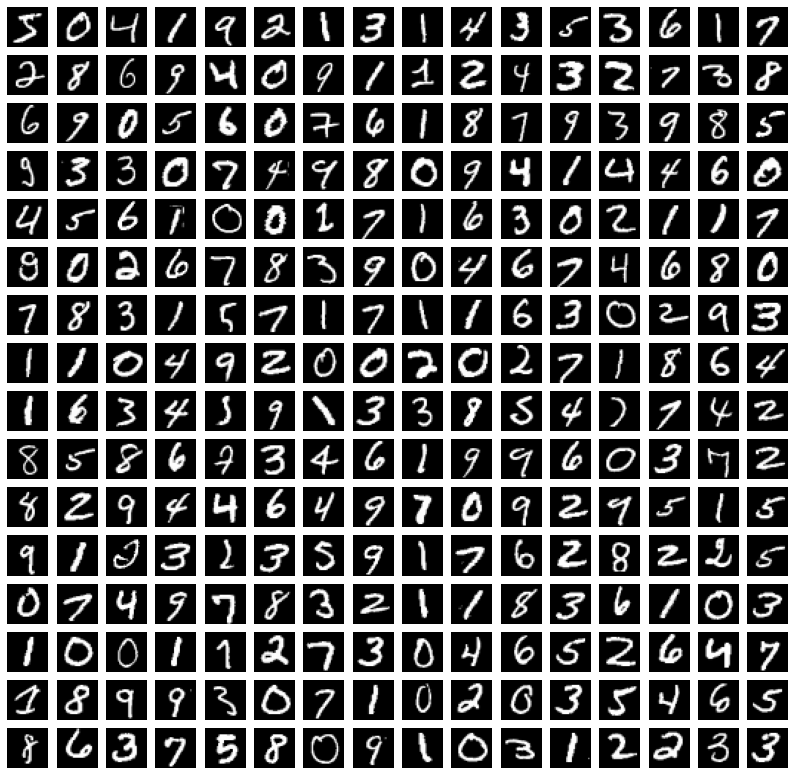

In [5]:
plt.figure(figsize = (14,14))
for i in range(256):
  plt.subplot(16,16,i+1)
  plt.axis('off')
  plt.imshow(x_train[i], cmap = 'gray')

In [6]:
x_train = x_train.reshape([60000,28,28,1])
x_test = x_test.reshape([10000,28,28,1])

In [7]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,   
)

train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train, y_train, batch_size = 256)

In [10]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen.fit(x_test)
val_generator = val_datagen.flow(x_test,y_test)

In [11]:
model = tf.keras.models.Sequential([
                    tf.keras.layers.Flatten(input_shape = (28,28,1)),
                    tf.keras.layers.Dense(256, activation = 'relu'),
                    tf.keras.layers.Dense(128, activation = 'relu'),
                    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [13]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer = SGD(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 40,
    verbose = 1
)

Epoch 1/40
235/235 [==============================] - 25s 98ms/step - loss: 2.0686 - accuracy: 0.3189 - val_loss: 1.5317 - val_accuracy: 0.6886
Epoch 2/40
235/235 [==============================] - 23s 98ms/step - loss: 1.5900 - accuracy: 0.5378 - val_loss: 0.9838 - val_accuracy: 0.7933
Epoch 3/40
235/235 [==============================] - 24s 101ms/step - loss: 1.2974 - accuracy: 0.6083 - val_loss: 0.7507 - val_accuracy: 0.8333
Epoch 4/40
235/235 [==============================] - 23s 99ms/step - loss: 1.1388 - accuracy: 0.6541 - val_loss: 0.6444 - val_accuracy: 0.8515
Epoch 5/40
235/235 [==============================] - 23s 98ms/step - loss: 1.0386 - accuracy: 0.6867 - val_loss: 0.5806 - val_accuracy: 0.8664
Epoch 6/40
235/235 [==============================] - 23s 98ms/step - loss: 0.9583 - accuracy: 0.7132 - val_loss: 0.5373 - val_accuracy: 0.8791
Epoch 7/40
235/235 [==============================] - 23s 97ms/step - loss: 0.8905 - accuracy: 0.7342 - val_loss: 0.4980 - val_accuracy

In [15]:
type(history)

keras.callbacks.History

In [16]:
type(history.history)

dict

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
history.history['accuracy']

[0.3188999891281128,
 0.5378166437149048,
 0.6083499789237976,
 0.6541000008583069,
 0.6867499947547913,
 0.7131999731063843,
 0.7341833114624023,
 0.7573166489601135,
 0.7700666785240173,
 0.7865999937057495,
 0.798966646194458,
 0.8122833371162415,
 0.8251000046730042,
 0.8350499868392944,
 0.8415666818618774,
 0.8520833253860474,
 0.8594333529472351,
 0.8653166890144348,
 0.8700833320617676,
 0.8761500120162964,
 0.8812000155448914,
 0.8862666487693787,
 0.8898666501045227,
 0.8928333520889282,
 0.897266685962677,
 0.9007333517074585,
 0.9015166759490967,
 0.9033499956130981,
 0.90625,
 0.9103000164031982,
 0.9122666716575623,
 0.915149986743927,
 0.9160166382789612,
 0.9177166819572449,
 0.9179666638374329,
 0.9213166832923889,
 0.9217166900634766,
 0.9225833415985107,
 0.9242166876792908,
 0.9254999756813049]

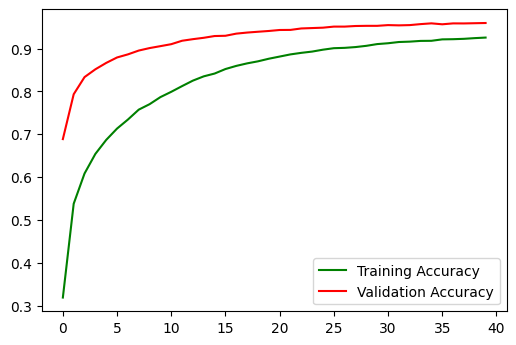

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(dpi =100)
plt.plot(acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.legend()


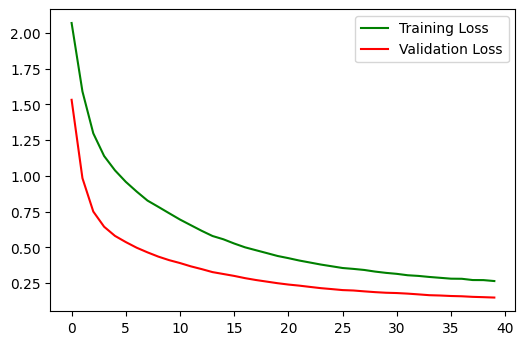

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(dpi = 100)
plt.plot(loss, color = 'green', label = 'Training Loss')
plt.plot(val_loss, color = 'red', label = 'Validation Loss')
plt.legend()

In [28]:
model.predict(x_test[0:1])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

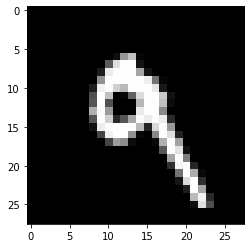

In [27]:
plt.imshow(x_test[7].reshape([28,28]), cmap = 'gray')

In [29]:
model.predict(x_test[0:10])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [33]:
pred = np.argmax(model.predict(x_test[0:16]), axis = 1)
pred

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5])

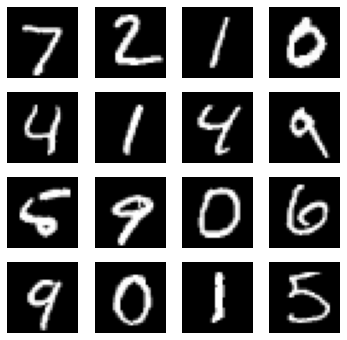

In [32]:
plt.figure(figsize = (6,6))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.axis('off')
  plt.imshow(x_test[i].reshape([28,28]), cmap = 'gray')

In [40]:
def detect_digit(x):
  pred = np.argmax(model.predict(x), axis = 1)
  print('The given image is of digit : ', pred[0])
  plt.figure()
  plt.axis('off')
  plt.imshow(x.reshape([28,28]), cmap = 'gray')

The given image is of digit :  7


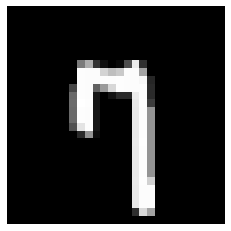

In [43]:
detect_digit(x_test[80:81])

In [45]:
from sklearn.metrics import confusion_matrix
pred_test = np.argmax(model.predict(x_test), axis = 1)
y_test = np.argmax(y_test, axis = 1)
cm = confusion_matrix(y_test, pred_test)

In [46]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


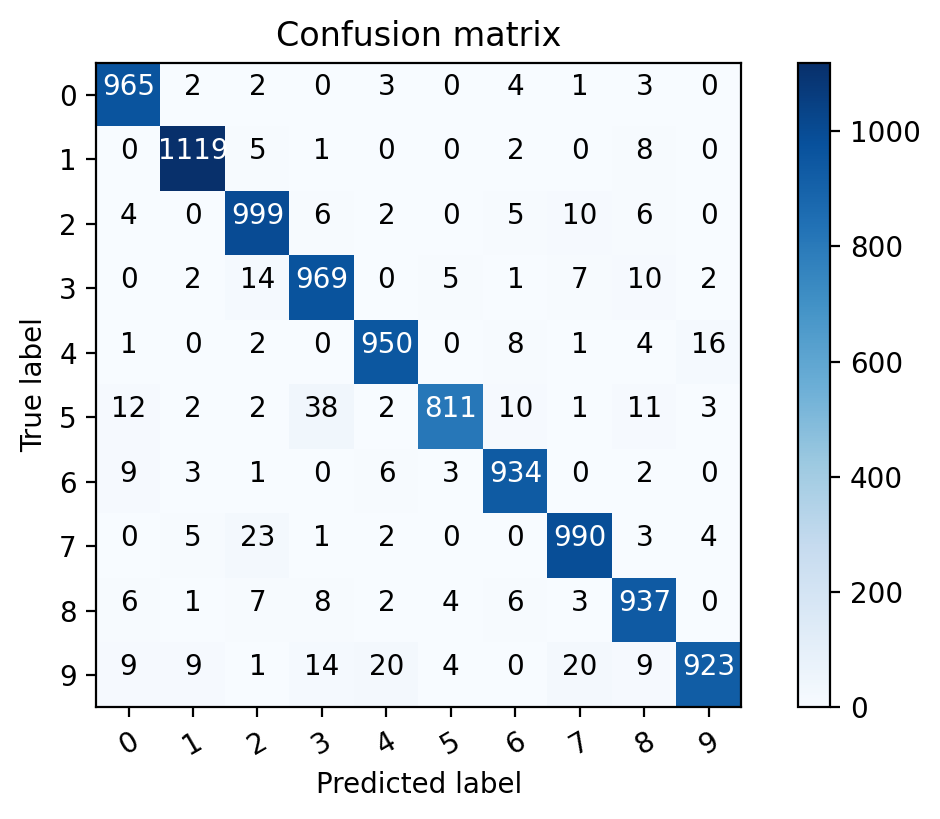

In [47]:
plt.figure(dpi = 200)
classes = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(cm,classes)